# Problem in the data

**Columns**


1. title

  - Duplicated row in row number 3 , row number 41, 57, 60, 3, 74, 79, 172, from 430 to 435 and 437, 1013, 1026,1550, 1541, 1527 (1064, 1082)->they are duplicated book name but others features are different. `ACCURACY`

  - Row number 2001 contains book name in korean language.

  - Row number 1191, 1614, 1618, 1626, 1629, 1999 contains book name in spanish language. `CONSISTENCY`

  - Row number 1994, 1996, 1997 contains book name in greek language.`CONSISTENCY`

  - Row number 1995 contains book name in occitan language.`CONSISTENCY`

  - Row number 1757 contains book name in thai language.`CONSISTENCY`

  - Row number 1749 contains book name in hungarian language.`CONSISTENCY`

  - Row number 1558, 1559, 1560, 1612, 1622, 1632, 1634 contains book name in Italian language.`CONSISTENCY`

  - Row number 1630, 1631, 1633 contains book name in Vietnamese language.`CONSISTENCY`

  - Row number 1627, 1628 contains book name in Portuguese (Brazil) language.`CONSISTENCY`

  - Row number 1623 contains book name in Turkish language.`CONSISTENCY`

  - Row number 1619 contains book name in Norwegian `CONSISTENCY`

  - Row number 1616 contains book name in Portuguese (Portugal).`CONSISTENCY`

  - Row number 1615 contains book name in Polish.`CONSISTENCY`

  - Row number 1563 contains book name in Chinese.`CONSISTENCY`

  - Incomplete Name of book like in row 896 (Collection # 6) which full name is Collection #6: 30 New Scripts From The Australian Script Centre

  - Row number 1429, 1496 contains book name in French language.`CONSISTENCY`

  - Row number 1481, 1485 contains book name in Czech language.`CONSISTENCY`

  - Row number 1480 contains book name in Slovak language.`CONSISTENCY`

  - Row number 146 contains book in both english and chinese language.`CONSISTENCY`

  - Row number 1413 contains both english and Vietnamese language.`CONSISTENCY`

  - Row numnber 1327 contains both english and greek language.`CONSISTENCY`
  
  - There are many books with same name but different features. `Uniqueness`


2. Auhor

  - There are many unknown author. `COMPLETENESS`

  - Row 88 have invalid 'various' author name. `VALIDITY`

  - Some author names are written in other language than english. `CONSISTENCY`

3. pages

 - The column pages does not have much problems.

4. genre

  - There are many unknown genre. `COMPLETENESS`

  - Genre contains country name like America, US, United States. `VALIDITY`

  - Genre also contains Body, Mind & Spirit which can be replaced to Spirituality. `VALIDITY`

  - Genre also contains Food, Apple, Banana,etc. which can be replace to agriculture. `VALIDITY`


5. description

  - There are many 'No description available' written. `COMPLETENESS`

  - Multiple times duplicated description in row 40 to 70 and 430 to 436.`ACCURACY`

  - Same description of different book in row no 182, 183, 187.`ACCURACY`

  - Invalid book description in row 185. `VALIDITY`

  - Invalid symbol in row 278 ( � ) and in row number 517. `VALIDITY` (.......................)

  - Row 951 have description in nepali language. `CONSISTENCY`

6. published_date

  - Date is not complete (1996). `COMPLETENESS`

  - Incomplete date (2008-12). `COMPLETENESS`

  - Some dates are seperated by / and some are seperated by - `CONSISTENCY`

  - Many Unknown values. `COMPLETENESS`

  - Different date format in row 1822 2012-12-13T00:00:00+01:00. `CONSISTENCY`

7. publisher

  - Many 'Unknown Publisher ' values. `COMPLETENESS`

  - Row number 1565, 1505 is written in Sindhi language. `CONSISTENCY`

  - Row number 1563 is written in chinese language.`CONSISTENCY`

  - Some are written in spanish, Turkish.`CONSISTENCY`

8. language

  - This column is quite normal.

9. average_rating

  - Lots of 'No rating'. `COMPLETENESS`


10. rating_co
  - Rating count varies a lot some have one digit whereas some have six digit rating.`CONSISTENCY`

11. thumbnail

  - This column is also quite normal.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import pandas as pd
import time
import json
import os
from datetime import datetime


In [2]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv('/content/data_clean_it.csv')
df.sample(5)

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
534,Federal Register,Unknown Author,492,Delegated legislation,No description available,2013-10,Unknown Publisher,en,4,1,http://books.google.com/books/content?id=XpLar...
929,"The Children of the Chapel at Blackfriars, 159...","Charles William Wallace, Myron Harmon Swenk",488,Child actors,No description available,1908,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=DeNkc...
1025,The Adventures of Sherlock Holmes,Arthur Conan Doyle,168,Fiction,"Detective Sherlock Holmes, the master of deduc...",2005,"Sterling Publishing Company, Inc.",en,4,71,http://books.google.com/books/content?id=23N1_...
819,Ancient Communities in the Mimbres Valley,"Roger Anyon, Steven A. LeBlanc",589,History,"""Spanning from the end of the Classic Mimbres ...",2024-04-09,University of Arizona Press,en,No rating,0,http://books.google.com/books/content?id=ukPyE...
1380,Shallow Foundations,Braja M. Das,394,Technology & Engineering,The First Comprehensive Guide to Shallow Found...,2002-01-01,CRC Press,en,No rating,0,http://books.google.com/books/content?id=xQ12S...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [ ]:
#Data cleaning
#It's a good idea to replace following words to nan because they are actually nan values.
null_values = ['Unknown', 'unknown', 'No description available',
               'No rating', 'Unknown Publisher', 'anonymous',
               'Anonymous', '', ' ', 'N/A', 'null','Unknown Author','various','Unknown Genre']
df = df.replace(null_values, np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          1791 non-null   object
 2   pages           2046 non-null   object
 3   genre           1803 non-null   object
 4   description     1543 non-null   object
 5   published_date  1963 non-null   object
 6   publisher       1516 non-null   object
 7   language        2049 non-null   object
 8   average_rating  278 non-null    object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [ ]:
# Converting columns type into suitable format


df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')


# Since our published_date column have many mixed date format i.e."YYYY","MM/DD/YYYY","YYYY-MM","MM-DD-YYYY" using only pd.to_datetime is not appropriate
# We will use funtion to handle all sorts of problem


def parse_mixed_dates(date_str):
    if pd.isna(date_str):
        return pd.NaT
    date_str = str(date_str).strip()

    # Case 1: Year only (e.g., "1996")
    if date_str.isdigit() and len(date_str) == 4:
        return pd.to_datetime(f"{date_str}-01-01", errors='coerce')

    # Case 2: Year-Month (e.g., "1985-04")
    if len(date_str) == 7 and '-' in date_str:
        return pd.to_datetime(f"{date_str}-01", errors='coerce')

    # Case 3: Regular full date formats (e.g., "9/1/2010", "12/13/2017")
    return pd.to_datetime(date_str, errors='coerce')

# Apply function to your column
df['published_date'] = df['published_date'].apply(parse_mixed_dates)

In [ ]:
df['published_date']

0       1996-01-01 00:00:00
1       2010-09-01 00:00:00
2       2004-01-01 00:00:00
3       2007-01-01 00:00:00
4       1985-01-01 00:00:00
               ...         
2044    2016-01-05 00:00:00
2045    2001-04-01 00:00:00
2046    2004-12-28 00:00:00
2047    1999-03-01 00:00:00
2048    2023-05-16 00:00:00
Name: published_date, Length: 2049, dtype: object

In [ ]:
df.isnull().sum()

title                0
author             258
pages                3
genre              246
description        506
published_date      89
publisher          533
language             0
average_rating    1771
ratings_count        0
thumbnail            0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
#data cleaning
# title column

# This function removes duplicate books based on title and author, keeping the first occurrence
# Which ensure that we do not delete

def remove_duplicate_books(df):
    # Create a copy to avoid modifying the input DataFrame
    df = df.copy()
    # Convert title and author to lowercase for case-insensitive comparison
    df['title_lower'] = df['title'].str.lower()
    df['author_lower'] = df['author'].str.lower()
    # Drop duplicates based on lowercase title and author, keep first occurrence
    df_unique = df.drop_duplicates(subset=['title_lower', 'author_lower'], keep='first')
    # Remove temporary columns
    df_unique = df_unique.drop(columns=['title_lower', 'author_lower'])
    # Reset index to start from 0
    df_unique = df_unique.reset_index(drop=True)

    return df_unique

# Apply the function
df1 = remove_duplicate_books(df1)

In [ ]:
# First, we need to create a column with an index that starts from 2, because I performed all my analysis using Excel, where the index begins at 2. So, we need to adjust accordingly.
# Pandas and excel indexing are different

## Note: There is now a mismatch in row numbers because i previously wrote row numbers before removing duplicates. After duplicate removal, the row numbers no longer match

df1 = df1.reset_index()
df1['index'] = df1['index'] + 2
df1

,index,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,2,Fictional Points of View,Peter Lamarque,252.0,Literary Criticism,The volume focuses on a wide range of thinkers...,1996-01-01 00:00:00,Cornell University Press,en,NaN,0,http://books.google.com/books/content?id=rh-om...
1,3,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802.0,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01 00:00:00,Wildside Press LLC,en,NaN,0,http://books.google.com/books/content?id=P8zW2...
2,4,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662.0,"Subject headings, Library of Congress",NaN,2004-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=pEhkh...
3,5,Library of Congress Subject Headings,Library of Congress,1512.0,"Subject headings, Library of Congress",NaN,2007-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=FgAjF...
4,6,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248.0,Fiction,Fictional space is the imaginal expanse of fie...,1985-01-01 00:00:00,Bucknell University Press,en,NaN,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1980,The Index Card,"Helaine Olen, Harold Pollack",256.0,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05 00:00:00,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
1979,1981,The Road to Wealth,Suze Orman,608.0,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01 00:00:00,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
1980,1982,The Success Principles,Jack Canfield,512.0,Self-Help,A guide to achieving personal and financial su...,2004-12-28 00:00:00,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...
1981,1983,The Courage to Be Rich,Suze Orman,448.0,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01 00:00:00,Riverhead Books,en,4.0,40000,http://books.google.com/books/content?id=2c3_D...


<Axes: xlabel='title'>

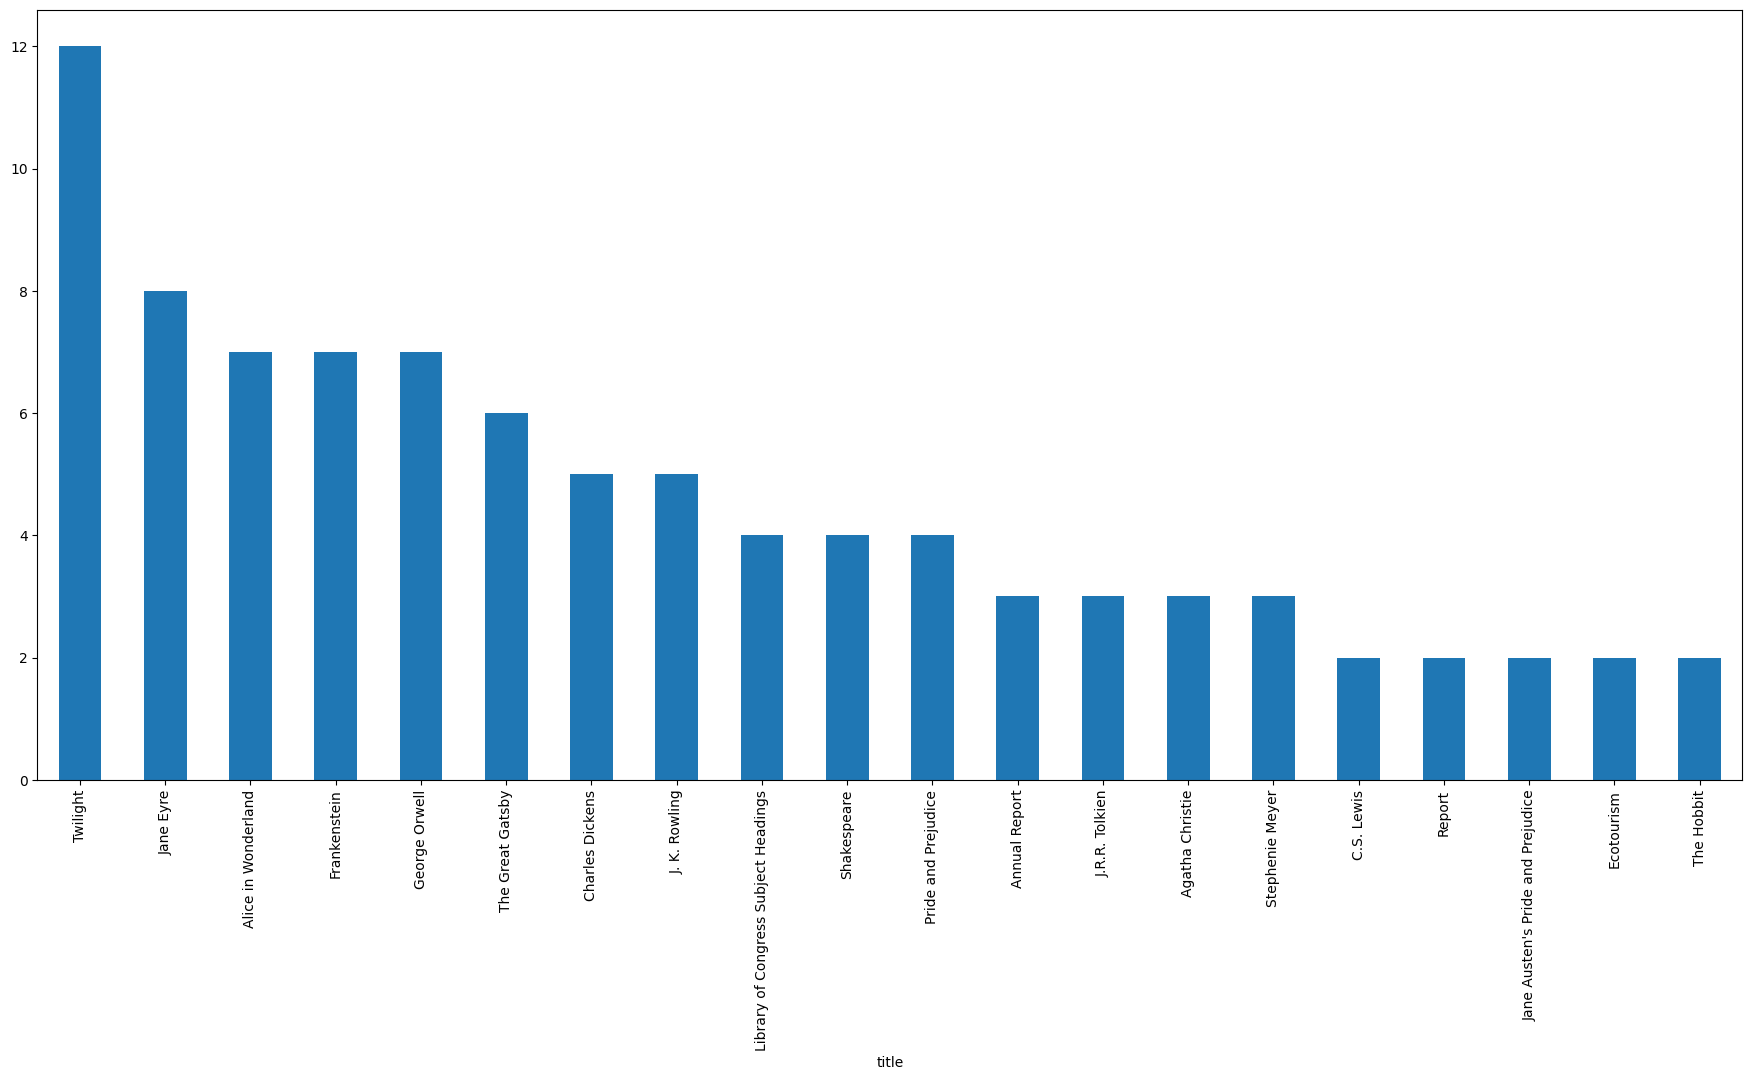

In [ ]:
#analysis
plt.figure(figsize=(22,10))
df1['title'].value_counts().head(20).plot(kind="bar")

In [ ]:
counts = df1['title'].value_counts()
counts[counts > 3]

title
Twilight                                12
Jane Eyre                                8
Alice in Wonderland                      7
Frankenstein                             7
George Orwell                            7
The Great Gatsby                         6
Charles Dickens                          5
J. K. Rowling                            5
Library of Congress Subject Headings     4
Shakespeare                              4
Pride and Prejudice                      4
Name: count, dtype: int64

In [ ]:
frequent_titles = counts[counts > 3].index
df1[df1['title'].isin(frequent_titles)]

,index,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
2,4,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662.0,"Subject headings, Library of Congress",NaN,2004-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=pEhkh...
3,5,Library of Congress Subject Headings,Library of Congress,1512.0,"Subject headings, Library of Congress",NaN,2007-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=FgAjF...
161,163,Library of Congress Subject Headings,"Library of Congress, Library of Congress. Subj...",1474.0,Subject headings,NaN,1994-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=bLS54...
675,677,Library of Congress Subject Headings,"Library of Congress, Library of Congress. Offi...",1396.0,"Subject headings, Library of Congress",NaN,2004-01-01 00:00:00,NaN,en,4.0,2,http://books.google.com/books/content?id=YZlf5...
941,943,Pride and Prejudice,Jane Austen,448.0,Courtship,Austen’s most celebrated novel tells the story...,1918-01-01 00:00:00,NaN,en,4.0,374,http://books.google.com/books/content?id=s1gVA...
...,...,...,...,...,...,...,...,...,...,...,...,...
1680,1682,J. K. Rowling,Cari Meister,28.0,Juvenile Nonfiction,"Traces the childhood, education, and career of...",2001-01-01 00:00:00,ABDO,en,NaN,0,http://books.google.com/books/content?id=7nmbh...
1681,1683,J. K. Rowling,Colleen A. Sexton,116.0,Juvenile Nonfiction,"Presents a biography of celebrated author, J.K...",2007-10-01 00:00:00,Twenty-First Century Books,en,NaN,0,http://books.google.com/books/content?id=gX2lA...
1687,1689,J. K. Rowling,Jennifer Hunsicker,34.0,Juvenile Nonfiction,Readers will learn about the life and works of...,2018-01-25 00:00:00,Raintree,en,NaN,0,http://books.google.com/books/content?id=djRKD...
1689,1691,J. K. Rowling,Joanne Mattern,130.0,"Authors, English",Presents a biography of the author of the Harr...,2009-01-01 00:00:00,Infobase Publishing,en,NaN,0,http://books.google.com/books/content?id=9S08k...


In [ ]:
# author column
df1['author'].isna().sum()

np.int64(204)

In [ ]:
df1['author'].value_counts()

author
Stephen King                                                       22
Agatha Christie                                                    21
Dan Brown                                                          20
Charles Dickens                                                    17
George Orwell                                                      14
                                                                   ..
Billy Collins                                                       1
Johann Hoffmann                                                     1
Michel Chaouli, Jan Lietz, Jutta Müller-Tamm, Simon Schleusener     1
Stephen Phillips, Galloway Kyle, Harold Monro                       1
Nigel Toye, Francis Prendiville                                     1
Name: count, Length: 1454, dtype: int64

In [ ]:
import pandas as pd
import requests
import time

# Loop through rows where 'author' is missing
for idx, row in df1[df1['author'].isna()].iterrows():
    query_parts = []

    if pd.notna(row.get("title")):
        query_parts.append(f"intitle:{row['title']}")
    if pd.notna(row.get("publisher")):
        query_parts.append(f"inpublisher:{row['publisher']}")
    if pd.notna(row.get("description")):
        query_parts.append(row['description'])
    if pd.notna(row.get("published_date")):
        query_parts.append(str(row['published_date']))

    if not query_parts:
        print(f"Skipping row {idx} — not enough data.")
        continue

    # Prepare Google Books query
    query = "+".join(query_parts).replace(" ", "+")
    google_books_url = "https://www.googleapis.com/books/v1/volumes"
    params = {"q": query, "maxResults": 1}

    try:
        # Try Google Books API
        response = requests.get(google_books_url, params=params)
        response.raise_for_status()
        items = response.json().get("items")
        if items:
            volume_info = items[0].get("volumeInfo", {})
            authors = volume_info.get("authors")
            if authors:
                df1.at[idx, "author"] = ", ".join(authors)
                print(f"✓ Filled author for row {idx} using Google Books: {authors}")
                time.sleep(5)
                continue
            else:
                print(f"✗ No author found for row {idx} in Google Books.")
        else:
            print(f"✗ No result for row {idx} in Google Books.")

    except Exception as e:
        print(f"⚠️ Google Books error at row {idx}: {e}")

    # Fallback: Try Open Library
    try:
        if pd.notna(row.get("title")):
            openlib_url = f"https://openlibrary.org/search.json"
            ol_params = {"title": row["title"]}
            ol_response = requests.get(openlib_url, params=ol_params)
            ol_response.raise_for_status()
            docs = ol_response.json().get("docs")
            if docs:
                author_name = docs[0].get("author_name")
                if author_name:
                    df1.at[idx, "author"] = ", ".join(author_name)
                    print(f"✓ Filled author for row {idx} using Open Library: {author_name}")
                else:
                    print(f"✗ No author found for row {idx} in Open Library.")
            else:
                print(f"✗ No result for row {idx} in Open Library.")
        else:
            print(f"⚠️ Cannot query Open Library for row {idx} — title missing.")

    except Exception as e:
        print(f"⚠️ Open Library error at row {idx}: {e}")

    time.sleep(1)  # Delay to avoid hitting rate limits

✗ No author found for row 6 in Google Books.
✓ Filled author for row 6 using Open Library: ['Bernd-Christian Otto', 'Dirk Johannsen']
✗ No result for row 9 in Google Books.
✓ Filled author for row 9 using Open Library: ['Various']
✓ Filled author for row 14 using Google Books: ['Boy Scouts of America']
✓ Filled author for row 18 using Google Books: ['Frederick Winthrop Faxon', 'Mary Estella Bates', 'Anne C. Sutherland']
✗ No author found for row 20 in Google Books.
✗ No author found for row 20 in Open Library.
✗ No author found for row 23 in Google Books.
✓ Filled author for row 23 using Open Library: ['Charlie Lovett']
✓ Filled author for row 24 using Google Books: ['NEWCASTLE LITERARY MAGAZINE.']
✗ No author found for row 26 in Google Books.
✗ No result for row 26 in Open Library.
✗ No author found for row 30 in Google Books.
✗ No result for row 30 in Open Library.
✓ Filled author for row 31 using Google Books: ['Porter Garnett']
✓ Filled author for row 32 using Google Books: ['Illin

In [ ]:
df1['author'].isna().sum()

np.int64(42)

we can see that many missing values are replace by this method but we want to fill all the author

There are still some missing values but it is very less so we can remove them

In [ ]:
df1.dropna(subset=["author"], inplace=True)

In [ ]:
## df1
df1['pages'].value_counts()

pages
212.0     13
192.0     13
232.0     12
36.0      11
220.0     10
          ..
1282.0     1
30.0       1
1512.0     1
1662.0     1
144.0      1
Name: count, Length: 775, dtype: int64

In [ ]:
px.box(df1,y='pages')

In [ ]:
df1['pages'].describe()

count    1938.000000
mean      408.855521
std       441.774731
min         8.000000
25%       178.250000
50%       292.000000
75%       496.000000
max      8114.000000
Name: pages, dtype: float64

In [ ]:
df1[df1['pages'] < 90][['genre','title','description','pages']]

,genre,title,description,pages
14,NaN,Boys' Life,Boys' Life is the official youth magazine for ...,64.0
29,Juvenile Fiction,Tessa Tiger's Temper Tantrums,Read Along or Enhanced eBook: Tessa Tiger like...,32.0
33,Catholic literature,Catalogue of Books by Catholic Writers in the ...,NaN,82.0
41,NaN,Science Spectrum,Science Spectrum hightlights the scientific ac...,40.0
65,NaN,The Historical Aspect of the American Churches,NaN,18.0
...,...,...,...,...
1876,Juvenile Nonfiction,Jennifer Lawrence,"On March 17, 2011, social media channels buzze...",52.0
1879,Juvenile Nonfiction,Josh Hutcherson,You may know that Josh Hutcherson became super...,36.0
1884,Juvenile Nonfiction,Shailene Woodley,You probably know Shailene Woodley as the fear...,36.0
1923,Drama,Alice's Adventures in Wonderland (World Classi...,Nothing's more magical than going down the rab...,89.0


In [ ]:
df1['pages'].isna().sum()

np.int64(3)

In [ ]:
Q1 = df1['pages'].quantile(0.25)
Q3 = df1['pages'].quantile(0.75)
IQR = Q3 - Q1
outliers = df1[(df1['pages'] < Q1 - 1.5 * IQR) | (df1['pages'] > Q3 + 1.5 * IQR)]
print(f"Outliers in pages:\n{outliers[['title', 'pages']]}")

Outliers in pages:
                                                  title   pages
2                  Library of Congress Subject Headings  1662.0
3                  Library of Congress Subject Headings  1512.0
21    Documents of the ... Legislature of the State ...  1592.0
22                               Papers and Proceedings  1112.0
39                               The American Catalogue  1306.0
...                                                 ...     ...
1883  Focus On: 100 Most Popular American Science Fi...  1180.0
1905       Focus On: 100 Most Popular American 3D Films  1791.0
1925                                   A Clash of Kings  1230.0
1931     Festín de cuervos (Canción de Hielo y Fuego 4)  1124.0
1933                                              검의 폭풍  2279.0

[142 rows x 2 columns]


In [ ]:
threshold = 1500
df1['pages'] = df1['pages'].clip(upper=threshold)

In [ ]:
df1['genre'].value_counts()

genre
Fiction                      238
Literary Criticism           171
Education                    100
Social Science                62
Biography & Autobiography     60
                            ... 
Astronautics                   1
Administrative procedure       1
Authors, English               1
Meteorology                    1
Subversive activities          1
Name: count, Length: 249, dtype: int64

In [ ]:
# Complete genre mapping for data cleaning
genre_mapping = {
    # Biography variations
    'Biography & Autobiography': 'Biography',
    'Biography': 'Biography',
    'Christian biography': 'Biography',

    # Children's books
    'Juvenile Fiction': 'Children',
    'Juvenile Nonfiction': 'Children',
    'Children': 'Children',
    'Children\'s stories': 'Children',
    'Children\'s stories, English': 'Children',
    'Young Adult Fiction': 'Children',
    'Young Adult Nonfiction': 'Children',
    'Children\'s libraries': 'Children',
    'Children\'s periodicals, American': 'Children',
    'Child actors': 'Children',
    'Child welfare': 'Children',
    'Children with visual disabilities': 'Children',
    'Foster children': 'Children',

    # Fiction variations
    'Fiction': 'Fiction',
    'English fiction': 'Fiction',
    'Fantasy fiction': 'Fiction',
    'Fantasy fiction, English': 'Fiction',
    'Fantasy fiction, American': 'Fiction',
    'Canadian fiction': 'Fiction',
    'Science fiction': 'Fiction',
    'Adventure stories': 'Fiction',
    'Christmas stories': 'Fiction',

    # Poetry variations
    'Poetry': 'Poetry',
    'English poetry': 'Poetry',
    'American poetry': 'Poetry',
    'Poetry, Modern': 'Poetry',
    'Folk poetry, Mundari': 'Poetry',
    'Sonnets, English': 'Poetry',

    # Drama variations
    'Drama': 'Drama',
    'English drama': 'Drama',
    'American drama': 'Drama',
    'French drama': 'Drama',
    'Australian drama': 'Drama',
    'Drama, Medieval': 'Drama',
    'College and school drama': 'Drama',

    # Literature and Literary Studies
    'Literary Criticism': 'Literature',
    'Literary Collections': 'Literature',
    'Literature': 'Literature',
    'English literature': 'Literature',
    'American literature': 'Literature',
    'Chinese literature': 'Literature',
    'Criticism': 'Literature',
    'American prose literature': 'Literature',
    'Catholic literature': 'Literature',
    'Humanism in literature': 'Literature',
    'Dystopias in literature': 'Literature',
    'Africans in literature': 'Literature',
    'Creation in literature': 'Literature',
    'Monsters in literature': 'Literature',

    # Health and Medical
    'Medical': 'Health & Medical',
    'Medicine': 'Health & Medical',
    'Health & Fitness': 'Health & Medical',
    'Health': 'Health & Medical',
    'Public health': 'Health & Medical',
    'Mental health': 'Health & Medical',
    'Psychology, Pathological': 'Health & Medical',
    'Health facilities': 'Health & Medical',
    'Health promotion': 'Health & Medical',
    'Anesthesia in obstetrics': 'Health & Medical',
    'Alcoholism': 'Health & Medical',
    'Aging': 'Health & Medical',
    'Communicable diseases': 'Health & Medical',

    # Technology and Engineering
    'Technology & Engineering': 'Technology',
    'Technology': 'Technology',
    'Computers': 'Technology',
    'Electronic data processing': 'Technology',
    'Telecommunication': 'Technology',
    'Cell phones': 'Technology',
    'Compact discs': 'Technology',
    'Airplanes': 'Technology',
    'Materials handling': 'Technology',
    'Electric lighting': 'Technology',

    # Science
    'Science': 'Science',
    'Mathematics': 'Science',
    'Botany': 'Science',
    'Coastal ecology': 'Science',
    'Evolution': 'Science',
    'Meteorology': 'Science',
    'Astronautics': 'Science',
    'Comets': 'Science',
    'Statistics': 'Science',
    'Classification of sciences': 'Science',

    # Business and Economics
    'Business & Economics': 'Business',
    'Personal Finance': 'Business',
    'Investing': 'Business',
    'Finance': 'Business',
    'Finance, Public': 'Business',
    'Banks and banking': 'Business',
    'Accounting': 'Business',
    'Retail trade': 'Business',
    'Entrepreneurship': 'Business',
    'Expense accounts and taxation': 'Business',
    'Income tax': 'Business',
    'Deficit financing': 'Business',
    'Savings and loan associations': 'Business',

    # Government and Politics
    'Government publications': 'Government',
    'Political Science': 'Government',
    'Law': 'Government',
    'Administrative law': 'Government',
    'Administrative procedure': 'Government',
    'Administrative agencies': 'Government',
    'Government purchasing': 'Government',
    'Local government': 'Government',
    'Legislative hearings': 'Government',
    'Session laws': 'Government',
    'Courts-martial and courts of inquiry': 'Government',
    'Jury': 'Government',
    'Labor laws and legislation': 'Government',
    'Educational law and legislation': 'Government',
    'Civil defense': 'Government',
    'Diplomatic and consular service, American': 'Government',
    'Consular reports': 'Government',

    # Education
    'Education': 'Education',
    'Study Aids': 'Education',
    'Language Arts & Disciplines': 'Education',
    'Foreign Language Study': 'Education',
    'English language': 'Education',
    'Classical education': 'Education',
    'Adult education': 'Education',
    'Art in education': 'Education',
    'Activity programs in education': 'Education',
    'Educational exchanges': 'Education',
    'Educational planning': 'Education',
    'Universities and colleges': 'Education',
    'Agricultural colleges': 'Education',

    # Arts and Entertainment
    'Art': 'Arts',
    'Performing Arts': 'Arts',
    'Music': 'Arts',
    'Dance': 'Arts',
    'Photography': 'Arts',
    'Architecture': 'Arts',

    # Religion and Philosophy
    'Religion': 'Religion & Philosophy',
    'Philosophy': 'Religion & Philosophy',
    'Philosophy, Ancient': 'Religion & Philosophy',
    'Bible': 'Religion & Philosophy',
    'Latter Day Saints': 'Religion & Philosophy',
    'Missions': 'Religion & Philosophy',
    'Reformation': 'Religion & Philosophy',
    'God': 'Religion & Philosophy',
    'Duty': 'Religion & Philosophy',
    'Freedom of religion': 'Religion & Philosophy',
    'Ethics': 'Religion & Philosophy',
    'Aesthetics': 'Religion & Philosophy',

    # Reference and Library Science
    'Reference': 'Reference',
    'Library catalogs': 'Reference',
    'Libraries': 'Reference',
    'Subject headings': 'Reference',
    'Subject headings, Library of Congress': 'Reference',
    'Encyclopedias and dictionaries': 'Reference',
    'Catalogs, Dictionary': 'Reference',
    'Classified catalogs (Dewey decimal)': 'Reference',
    'Index medicus': 'Reference',
    'Indexes': 'Reference',
    'Monographic series': 'Reference',
    'Library science': 'Reference',

    # Geographic/Location (keep specific or group as needed)
    'United States': 'Geography',
    'Great Britain': 'Geography',
    'Pennsylvania': 'Geography',
    'Massachusetts': 'Geography',
    'England': 'Geography',
    'Battle Creek (Mich.)': 'Geography',
    'New South Wales': 'Geography',
    'Cape Town (South Africa)': 'Geography',
    'Groton (Mass. : Town)': 'Geography',
    'France': 'Geography',
    'Albany (N.Y.)': 'Geography',
    'California': 'Geography',
    'New Jersey': 'Geography',
    'Washington (D.C.)': 'Geography',
    'Africa': 'Geography',
    'America': 'Geography',

    # Lifestyle and Hobbies
    'Cooking': 'Lifestyle',
    'Cooking, Indic': 'Lifestyle',
    'Cooking for military personnel': 'Lifestyle',
    'Cooking, American': 'Lifestyle',
    'Food': 'Lifestyle',
    'Crafts & Hobbies': 'Lifestyle',
    'Games & Activities': 'Lifestyle',
    'Sports & Recreation': 'Lifestyle',
    'Sports': 'Lifestyle',
    'Travel': 'Lifestyle',
    'Humor': 'Lifestyle',
    'Self-Help': 'Lifestyle',
    'Body, Mind & Spirit': 'Lifestyle',
    'Family & Relationships': 'Lifestyle',
    'Courtship': 'Lifestyle',
    'Dressmaking': 'Lifestyle',

    # Specialized/Professional
    'Comics & Graphic Novels': 'Entertainment',
    'Antiques & Collectibles': 'Collectibles',
    'Patents': 'Legal',
    'Trademarks': 'Legal',
    'Incunabula': 'Historical',
    'History': 'History',
    'Korean War, 1950-1953': 'History',
    'Apartheid': 'History',

    # Work and Industry
    'Agriculture': 'Industry',
    'Industrial statistics': 'Industry',
    'Feed industry': 'Industry',
    'Labor': 'Industry',
    'Hours of labor': 'Industry',
    'Occupations': 'Industry',
    'Exports': 'Industry',
    'Commercial statistics': 'Industry',
    'Hospitality industry': 'Industry',
    'Shipping': 'Industry',
    'Transportation': 'Industry',
    'Tourism': 'Industry',
    'Cotton baling': 'Industry',
    'Bananas': 'Industry',
    'Bread': 'Industry',
    'Apples': 'Industry',

    # Social and Community
    'Social Science': 'Social Science',
    'Psychology': 'Social Science',
    'Charities': 'Social Science',
    'Charitable uses, trusts, and foundations': 'Social Science',
    'Foundations': 'Social Science',
    'Housing': 'Social Science',
    'Older people': 'Social Science',
    'Subversive activities': 'Social Science',
    'Crime': 'Social Science',
    'Grants-in-aid': 'Social Science',
    'Economic development': 'Social Science',
    'Economic assistance, Domestic': 'Social Science',
    'Federal aid to research': 'Social Science',
    'Environmental protection': 'Social Science',
    'Natural resources': 'Social Science',
    'Censorship': 'Social Science',
    'Press': 'Social Science',
    'Electronic government information': 'Social Science',
    'Gazettes': 'Social Science',
    'Streets': 'Social Science',

    # Military and Defense
    'Retired military personnel': 'Military',
    'Chemical agents (Munitions)': 'Military',
    'Admiralty': 'Military',

    # Miscellaneous/Special
    'Supernatural': 'Fiction',  # Could be fiction or religion
    'Alice (Fictitious character : Carroll)': 'Fiction',
    'Hamlet (Legendary character)': 'Literature',
    'Divergent series': 'Fiction',
    'Authors, English': 'Biography',
    'Novelists, English': 'Biography',
    'Dramatists, English': 'Biography',
    'Charts, diagrams, etc': 'Reference',
    'English periodicals': 'Reference',
    'Galvanic skin response': 'Science',
    'Deep diving': 'Sports & Recreation',
    'Equity': 'Legal'
}

# Apply the mapping to dataframe
df1['genre'] = df1['genre'].map(genre_mapping).fillna(df1['genre'])

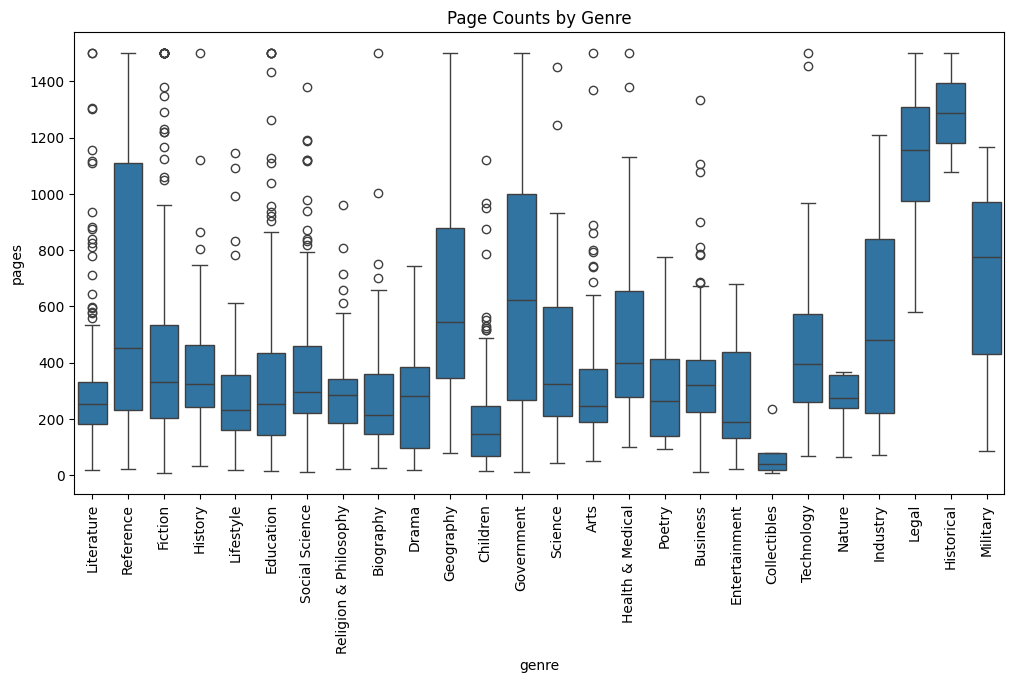

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='pages', data=df1)
plt.xticks(rotation='vertical')
plt.title('Page Counts by Genre')
plt.show()

In [ ]:
rare_genres = df1['genre'].value_counts()[df1['genre'].value_counts() < 20].index
df1.loc[df1['genre'].isin(rare_genres), 'genre'] = 'Other'
print(df1['genre'].value_counts())

genre
Fiction                  252
Literature               212
Education                157
Children                 130
Social Science           128
Business                  99
Religion & Philosophy     94
Arts                      87
Other                     77
Government                67
Biography                 67
Lifestyle                 66
Technology                63
Science                   59
Health & Medical          56
History                   46
Reference                 38
Drama                     32
Geography                 28
Name: count, dtype: int64


In [ ]:
genre_medians = df1.groupby('genre')['pages'].median()
df1['pages'] = df1.apply(lambda row: genre_medians[row['genre']] if pd.isna(row['pages']) else row['pages'], axis=1)

In [ ]:
df1.sample(2)

,index,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
803,805,The Contemporary Reader of Gender and Fat Studies,Amy Erdman Farrell,353.0,Social Science,The Contemporary Reader of Gender and Fat Stud...,2023-06-28 00:00:00,Taylor & Francis,en,NaN,0,http://books.google.com/books/content?id=cAfGE...
1470,1472,The Real Story of Alice in Wonderland,Kristen Doherty,35.0,Drama,"Was Alice really the sweet, innocent little gi...",2024-02-13 00:00:00,Stage Partners,en,NaN,0,http://books.google.com/books/content?id=12n1E...


<Axes: xlabel='genre'>

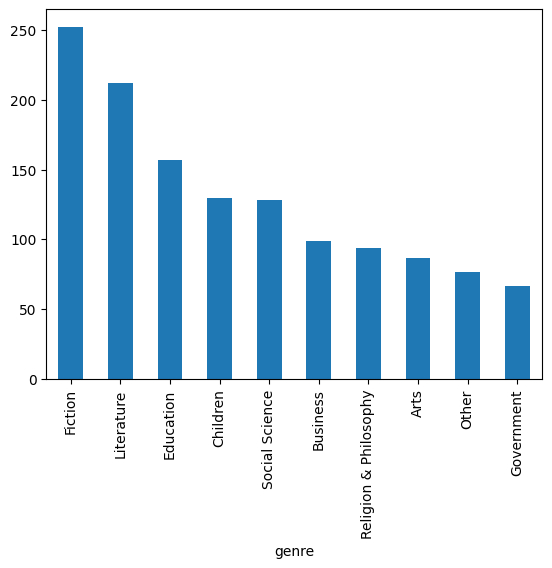

In [ ]:
df1['genre'].value_counts().head(10).plot(kind='bar')

In [ ]:
df1[df1['genre'].isna()]

,index,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
14,16,Boys' Life,Boy Scouts of America,64.0,NaN,Boys' Life is the official youth magazine for ...,1985-04-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=cWYEA...
24,26,The Central Literary Magazine,NEWCASTLE LITERARY MAGAZINE.,370.0,NaN,NaN,1909-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=buo5A...
28,30,Catalogue of books in the lending library. 2nd...,Edinburgh publ. libr,562.0,NaN,NaN,1891-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=mBxIp...
31,33,The Bohemian,Porter Garnett,896.0,NaN,NaN,1908-01-01 00:00:00,NaN,en,5.0,1,http://books.google.com/books/content?id=Rek4A...
35,37,A Catalogue of the Bibliographies of Special S...,Boston Public Library,160.0,NaN,NaN,1890-01-01 00:00:00,NaN,en,NaN,0,http://books.google.com/books/content?id=14IsA...
...,...,...,...,...,...,...,...,...,...,...,...,...
1862,1864,The J.A. Konrath Reading Order Checklist,J.A. Konrath,47.0,NaN,Joe Konrath has sold over two million books un...,2016-02-02 00:00:00,Joe Konrath,en,NaN,0,http://books.google.com/books/content?id=piyAC...
1883,1885,Focus On: 100 Most Popular American Science Fi...,Wikipedia contributors,1180.0,NaN,NaN,NaT,e-artnow sro,en,NaN,0,http://books.google.com/books/content?id=PM5CD...
1888,1890,Real Analysis (As per UGC & CBCS)  Eastern In...,MD Raisinghania,318.0,NaN,This textbook has been designed as per the UGC...,NaT,S. Chand Publishing,en,NaN,0,http://books.google.com/books/content?id=VbucE...
1892,1894,Algebra & Trigonometry,A. R. Vasishtha,469.0,NaN,NaN,NaT,Krishna Prakashan Media,en,5.0,3,http://books.google.com/books/content?id=zRL1B...


<Axes: >

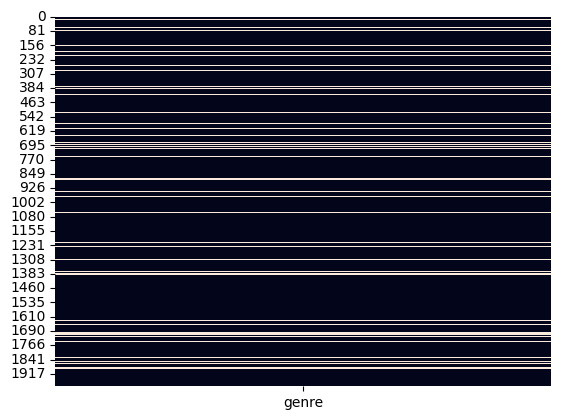

In [ ]:
#let's analyze nan values
sns.heatmap(df1[['genre']].isnull(), cbar=False)

In [ ]:
df1['genre'].isnull().sum()

np.int64(183)

In [ ]:
mode_genre = df1['genre'].mode()[0]
df1['genre'] = df1['genre'].fillna(mode_genre)

In [ ]:
df1['genre'].isnull().sum()

np.int64(0)

So far we have done data cleaning and analysis of three columns (title,author,pages,genre) and let's move ahead

In [ ]:
# description column
df1.sample(2)

,index,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
1234,1236,Shakespeare's Sonnets,Sunil Kumar Sarker,452.0,Other,"Though Sonnets Are, Generally, Easy Poems, Sha...",1998-01-01 00:00:00,Atlantic Publishers & Dist,en,5.0,1,http://books.google.com/books/content?id=BeKrQ...
851,853,Teaching the World's Children,"Mary Ashworth, Patricia Wakefield",106.0,Education,The language young children use is the languag...,2004-01-01 00:00:00,Pippin Publishing Corporation,en,5.0,1,http://books.google.com/books/content?id=mp4Fh...


In [ ]:
df1['description'].astype(object)

0       The volume focuses on a wide range of thinkers...
1       Science Fiction and Fantasy Literature, A Chec...
2                                                     NaN
3                                                     NaN
4       Fictional space is the imaginal expanse of fie...
                              ...                        
1978    Simplifies personal finance to ten rules that ...
1979    A comprehensive guide to managing money, inves...
1980    A guide to achieving personal and financial su...
1981    Combines emotional and practical advice for bu...
1982    A millennial-focused guide to budgeting, savin...
Name: description, Length: 1941, dtype: object

In [ ]:
df1['description'].isna().sum()

np.int64(451)

<Axes: >

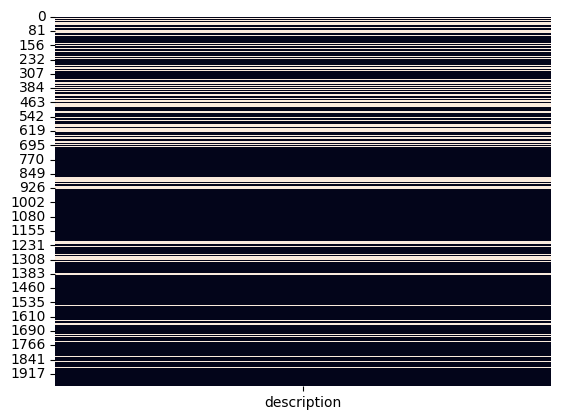

In [ ]:
sns.heatmap(df1[['description']].isnull(), cbar=False)

Since I do not want to lose much information, I will use the Google Books API along with the Open Library API to complete the missing values in the description column, as we did earlier.

In [ ]:
"""
Resumable Book Description Fetcher

This script fetches missing book descriptions from Google Books API and OpenLibrary API
with full resume capability. It automatically saves progress and can continue from where
it left off if interrupted.

Features:
- Automatically resumes from interruption point using progress file
- Tries Google Books API first, falls back to OpenLibrary API
- Saves progress every 10 processed rows
- Handles API errors gracefully with retry logic
- Provides detailed statistics and progress tracking
- Respects API rate limits with 3-second delays
- Cleans up progress file upon successful completion
"""

def get_description_google(title, author):
    try:
        query = f'intitle:{title}'
        if pd.notna(author):
            query += f'+inauthor:{author}'
        url = f'https://www.googleapis.com/books/v1/volumes?q={query}'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get('items')
            if items:
                description = items[0]['volumeInfo'].get('description', None)
                return description, 'Google'
    except Exception as e:
        print(f"   ⚠️ Google API Error: {str(e)}")
        return None, 'Google (error)'
    return None, 'Google (no result)'

def get_description_openlibrary(title, author):
    try:
        url = f'https://openlibrary.org/search.json?title={title}'
        if pd.notna(author):
            url += f'&author={author}'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            docs = data.get('docs')
            if docs:
                desc = docs[0].get('first_sentence') or docs[0].get('subtitle') or docs[0].get('title')
                return desc, 'OpenLibrary'
    except Exception as e:
        print(f"   ⚠️ OpenLibrary API Error: {str(e)}")
        return None, 'OpenLibrary (error)'
    return None, 'OpenLibrary (no result)'

In [ ]:
def save_progress(descriptions, current_idx, total_rows, progress_file='book_progress.json'):
    """Save current progress to a JSON file"""
    progress_data = {
        'timestamp': datetime.now().isoformat(),
        'current_index': current_idx,
        'total_rows': total_rows,
        'descriptions': descriptions
    }
    with open(progress_file, 'w', encoding='utf-8') as f:
        json.dump(progress_data, f, ensure_ascii=False, indent=2)
    print(f"   💾 Progress saved to {progress_file}")

def load_progress(total_rows, progress_file='book_progress.json'):
    """Load previous progress from JSON file"""
    if os.path.exists(progress_file):
        try:
            with open(progress_file, 'r', encoding='utf-8') as f:
                progress_data = json.load(f)

            if progress_data['total_rows'] == total_rows:
                print(f"📂 Found previous progress file: {progress_file}")
                print(f"   Last saved: {progress_data['timestamp']}")
                print(f"   ✅ Resuming from row {progress_data['current_index'] + 1}")
                return progress_data['current_index'], progress_data['descriptions']
            else:
                print(f"⚠️ Progress file exists but row count mismatch. Starting fresh.")
                return 0, []
        except Exception as e:
            print(f"⚠️ Error loading progress: {str(e)}. Starting fresh.")
            return 0, []
    return 0, []

# Load previous progress or start fresh
progress_file = 'book_progress.json'
start_idx, descriptions = load_progress(len(df1), progress_file)

# If starting fresh, initialize descriptions list
if start_idx == 0:
    descriptions = []

print(f"\n🚀 Starting description processing...")
print(f"   Total rows: {len(df1)}")
print(f"   Starting from row: {start_idx + 1}")

# Track statistics
stats = {
    'processed': 0,
    'google_success': 0,
    'openlibrary_success': 0,
    'failed': 0,
    'already_present': 0
}

try:
    # Loop through DataFrame with progress, starting from resume point
    for idx in range(start_idx, len(df1)):
        row = df1.iloc[idx]
        title = row['title']
        author = row.get('author', '')
        original = row['description']

        print(f"\n🔍 Processing row {idx+1}/{len(df1)}")
        print(f"   Title:  {title}")
        print(f"   Author: {author}")

        if pd.isna(original):
            desc, source = get_description_google(title, author)
            if desc:
                print(f"   ✅ Filled using Google Books API.")
                stats['google_success'] += 1
            else:
                print(f"   ❌ Google failed, trying Open Library...")
                desc, source = get_description_openlibrary(title, author)
                if desc:
                    print(f"   ✅ Filled using Open Library API.")
                    stats['openlibrary_success'] += 1
                else:
                    print(f"   ❌ Open Library also failed.")
                    desc = "No description available"
                    stats['failed'] += 1
            print(f"   📘 Final Description (preview): {desc[:100]}..." if desc else "   🚫 No description found.")
        else:
            desc = original
            print("   ✅ Description already present, keeping original.")
            stats['already_present'] += 1

        # Add to descriptions list or update existing
        if start_idx == 0 or len(descriptions) <= idx:
            descriptions.append(desc)
        else:
            descriptions[idx] = desc

        stats['processed'] += 1

        # Save progress every 10 rows
        if (idx + 1) % 10 == 0:
            save_progress(descriptions, idx, len(df1), progress_file)
            print(f"\n📊 Progress Update:")
            print(f"   Processed: {stats['processed']}")
            print(f"   Google Success: {stats['google_success']}")
            print(f"   OpenLibrary Success: {stats['openlibrary_success']}")
            print(f"   Failed: {stats['failed']}")
            print(f"   Already Present: {stats['already_present']}")

        # Respect API limits
        time.sleep(3)

except KeyboardInterrupt:
    print(f"\n⏸️ Process interrupted by user. Saving progress...")
    save_progress(descriptions, idx, len(df1), progress_file)
    print(f"   You can resume later by running the same code.")
    print(f"   Current progress: {len(descriptions)}/{len(df1)} rows processed")

# Final save and assignment
save_progress(descriptions, len(df1)-1, len(df1), progress_file)

# Replace descriptions in DataFrame
df1['description'] = descriptions

# Final statistics
print(f"\n🎉 Processing Complete!")
print(f"   Total Processed: {stats['processed']}")
print(f"   Google Books Success: {stats['google_success']}")
print(f"   OpenLibrary Success: {stats['openlibrary_success']}")
print(f"   Failed: {stats['failed']}")
print(f"   Already Present: {stats['already_present']}")
print(f"   Progress file: {progress_file}")

# Clean up progress file if completed successfully
if len(descriptions) == len(df1):
    try:
        os.remove(progress_file)
        print(f"   🗑️ Cleaned up progress file (processing complete)")
    except:
        pass


🚀 Starting description processing...
   Total rows: 1941
   Starting from row: 1

🔍 Processing row 1/1941
   Title:  Fictional Points of View
   Author: Peter Lamarque
   ✅ Description already present, keeping original.

🔍 Processing row 2/1941
   Title:  Science Fiction and Fantasy Literature
   Author: R. Reginald, Douglas Menville, Mary A. Burgess
   ✅ Description already present, keeping original.

🔍 Processing row 3/1941
   Title:  Library of Congress Subject Headings
   Author: Library of Congress. Cataloging Policy and Support Office
   ❌ Google failed, trying Open Library...
   ✅ Filled using Open Library API.
   📘 Final Description (preview): Library of Congress subject headings...

🔍 Processing row 4/1941
   Title:  Library of Congress Subject Headings
   Author: Library of Congress
   ❌ Google failed, trying Open Library...
   ✅ Filled using Open Library API.
   📘 Final Description (preview): Edited by Marguerite V. Quattlebaum....

🔍 Processing row 5/1941
   Title:  Fictio

In [ ]:
#Basic cleaning of our data
import re

def clean_description(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                                 # Lowercase
    text = re.sub(r'\n', ' ', text)                     # Remove newline chars
    text = re.sub(r'\[.*?\]', '', text)                 # Remove [brackets]
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Remove URLs
    text = re.sub(r'<.*?>+', '', text)                  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)          # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()            # Remove extra whitespace
    return text

df1['description'] = df1['description'].apply(clean_description)


In [ ]:
df1['description'].isna().sum()

np.int64(0)

In [ ]:
temp_df = df1['description'].value_counts().sort_values(ascending=False)

In [ ]:
temp_df

description
no description available                                                                                                                                                                                                                                                                                                                                                                               161
                                                                                                                                                                                                                                                                                                                                                                                                         7
b sch s v nh m tr chi vng quyn l mt series tiu thuyt s thi vin tng ca tiu thuyt gia ni ting ngi m george r r martin ly cm hng t tiu thuyt cuc chin hoa hng v ivanhoe martin bt u vit b sch vo nm 1991 

In [ ]:
df1[df1['published_date'].isna()]

,index,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
71,73,The Nostradamus Enigma: History's Most Famous ...,Anonymous,71.0,Arts,the nostradamus enigma historys most famous se...,NaT,NaN,en,NaN,0,http://books.google.com/books/content?id=RIwHE...
123,125,Mystery Shopping Secrets,R.K.,80.0,Lifestyle,some of topics covered inside this ebook how t...,NaT,大賢者外語,en,NaN,0,http://books.google.com/books/content?id=657sD...
137,139,The Paschal Mystery Workbook,Sophia Institute for Teachers,159.0,Religion & Philosophy,no description available,NaT,Sophia Institute for Teachers,en,NaN,0,http://books.google.com/books/content?id=og8FE...
149,151,"The Mystery of Israel's Salvation, Explained a...",Increase Mather,248.0,Fiction,no description available,NaT,NaN,en,NaN,0,http://books.google.com/books/content?id=8jIAv...
209,211,Focus On: 100 Most Popular 2010s Fantasy Films,Wikipedia contributors,1343.0,Fiction,no description available,NaT,e-artnow sro,en,NaN,0,http://books.google.com/books/content?id=Ms5CD...
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1899,ADVANCED CALCULUS,"B. R. THAKUR, HARI KISHAN",621.0,Science,mathematics ganit ram prasad rpp unfied rp har...,NaT,Ram Prasad Publications(R.P.H.),en,NaN,0,http://books.google.com/books/content?id=9MUpE...
1905,1907,Focus On: 100 Most Popular American 3D Films,Wikipedia contributors,1500.0,Fiction,no description available,NaT,e-artnow sro,en,NaN,0,http://books.google.com/books/content?id=2s1CD...
1926,1928,Το καταφύγιο των ανέμων,"George R. R. Martin, Lisa Tuttle",568.0,Fiction,,NaT,Metaichmio Publications,el,NaN,0,http://books.google.com/books/content?id=X8IID...
1928,1930,Τα ταξίδια του ταφ,George R. R. Martin,511.0,Fiction,,NaT,Metaichmio Publications,el,NaN,0,http://books.google.com/books/content?id=SNkqD...


In [ ]:
df1.shape

(1941, 12)

<Axes: >

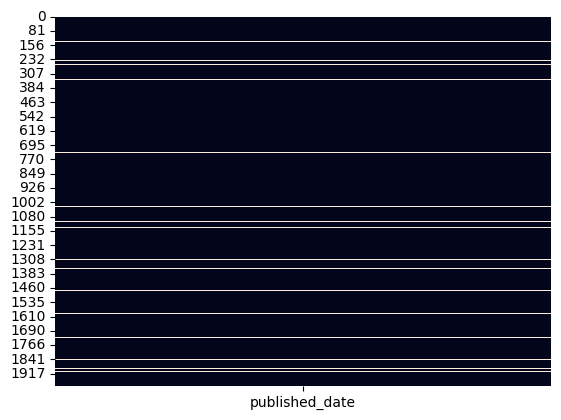

In [ ]:
sns.heatmap(df1[['published_date']].isnull(), cbar=False)

In [ ]:
df1['published_date'].info()

<class 'pandas.core.series.Series'>
Index: 1941 entries, 0 to 1982
Series name: published_date
Non-Null Count  Dtype 
--------------  ----- 
1860 non-null   object
dtypes: object(1)
memory usage: 30.3+ KB


In [ ]:
df1['published_date']=df1['published_date'].fillna(df1['published_date'].median())

In [ ]:
df1['published_date'].isna().sum()

np.int64(0)

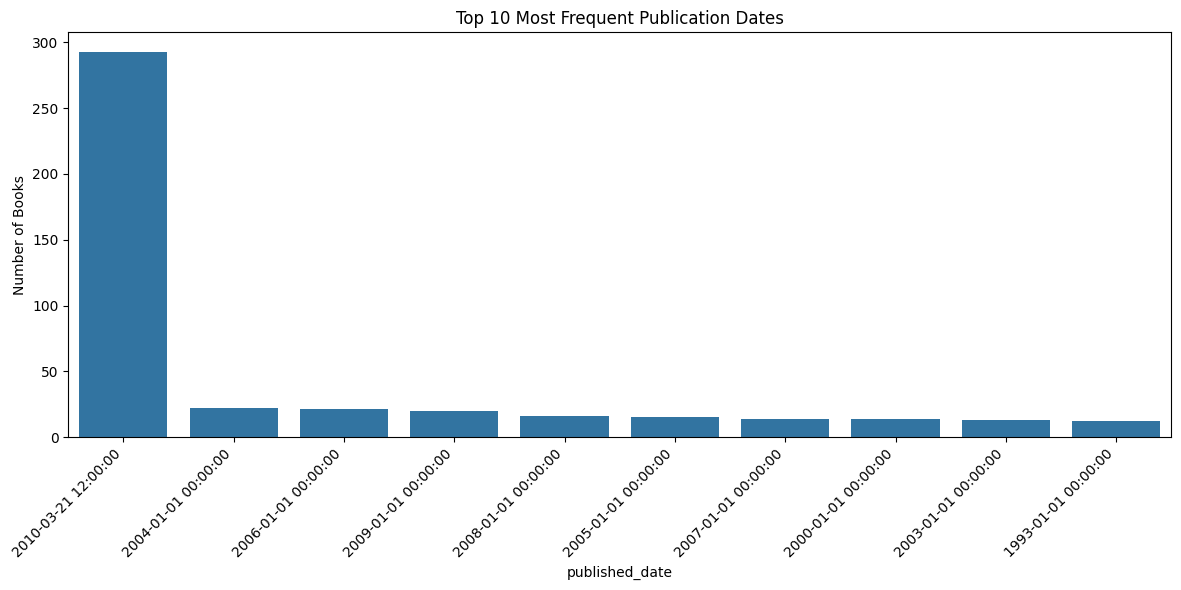

In [ ]:
# Get the top 10 most frequent publication dates
top_dates = df1['published_date'].value_counts().sort_values(ascending=False).head(10)

# Create a DataFrame for seaborn
temp_df = pd.DataFrame({
    'published_date': top_dates.index,
    'count': top_dates.values
})

plt.figure(figsize=(12, 6))
sns.barplot(data=temp_df, x='published_date', y='count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Frequent Publication Dates')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()

In [ ]:
df1['publisher'].value_counts()

publisher
Simon and Schuster                                                                   56
Routledge                                                                            44
John Wiley & Sons                                                                    40
McFarland                                                                            39
Springer Nature                                                                      32
Springer                                                                             32
Taylor & Francis                                                                     28
Cambridge University Press                                                           28
Springer Science & Business Media                                                    26
Oxford University Press                                                              25
Lulu.com                                                                             16
Gramedia Pustaka Utama

In [ ]:
df1['publisher'] = df1['publisher'].str.lower().str.replace('&', 'and').str.strip()
df1['publisher'] = df1['publisher'].replace({
    'simon and schuster': 'simon and schuster',
    'simon & schuster': 'simon and schuster',
    'springer nature': 'springer',
    'springer science & business media': 'springer'
})

In [ ]:
df1 = df1[df1['publisher'].str.contains(r'^[a-zA-Z0-9\s&.,-]+$', na=False)]

Text(0.5, 1.0, 'top publisher')

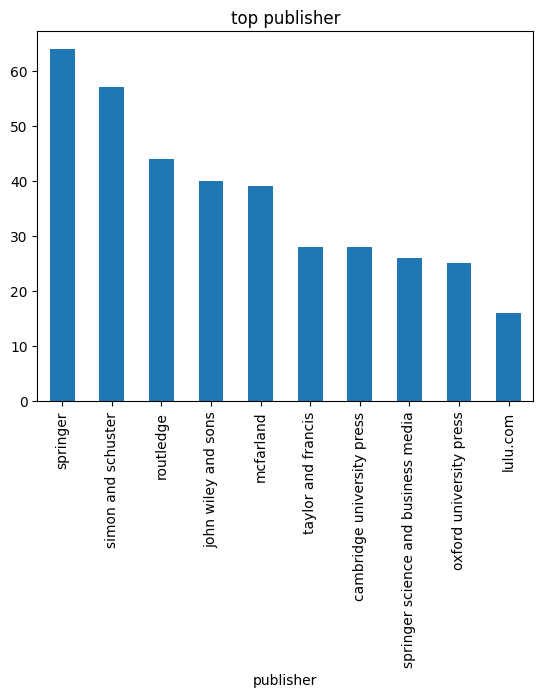

In [ ]:
df1['publisher'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("top publisher")

In [ ]:
df1['language'].value_counts()

language
en    1359
id      21
it      14
pt       7
el       5
es       5
vi       4
fr       3
cs       3
ne       2
sv       2
ms       2
mr       2
no       2
gl       1
hi       1
tr       1
pl       1
hu       1
th       1
Name: count, dtype: int64

language clearly will not contribute to our prediction because almost 90 percent of data is in english.

In [ ]:
df1.head(2)

,index,title,author,pages,genre,description,published_date,publisher,average_rating,ratings_count,thumbnail
0,2,Fictional Points of View,Peter Lamarque,252.0,Literature,the volume focuses on a wide range of thinkers...,1996-01-01,cornell university press,NaN,0,http://books.google.com/books/content?id=rh-om...
1,3,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802.0,Reference,science fiction and fantasy literature a check...,2010-09-01,wildside press llc,NaN,0,http://books.google.com/books/content?id=P8zW2...


In [ ]:
df1.drop(columns=['language'],inplace=True)

/tmp/ipykernel_19971/2255913547.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def clean_description(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                                 # Lowercase
    text = re.sub(r'\n', ' ', text)                     # Remove newline chars
    text = re.sub(r'\[.*?\]', '', text)                 # Remove [brackets]
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Remove URLs
    text = re.sub(r'<.*?>+', '', text)                  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)          # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()            # Remove extra whitespace
    return text

df1['publisher'] = df1['publisher'].apply(clean_description)


/tmp/ipykernel_19971/2749099759.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['publisher'].isna().sum()

np.int64(0)

In [ ]:
#average_rating column
df1['average_rating'].info()

<class 'pandas.core.series.Series'>
Index: 1437 entries, 0 to 1982
Series name: average_rating
Non-Null Count  Dtype  
--------------  -----  
223 non-null    float64
dtypes: float64(1)
memory usage: 22.5 KB


In [ ]:
df1['average_rating'].isna().sum()

np.int64(1214)

there are lot of null values so we should replace them with google book api and open library api

In [ ]:
def get_google_books_rating(title, author=None):
   """Get rating from Google Books API"""
   try:
       query = f'intitle:"{title}"'
       if author:
           query += f' inauthor:"{author}"'

       url = "https://www.googleapis.com/books/v1/volumes"
       params = {'q': query, 'maxResults': 3}

       response = requests.get(url, params=params, timeout=10)
       data = response.json()

       if 'items' in data:
           for item in data['items']:
               vol_info = item.get('volumeInfo', {})
               if 'averageRating' in vol_info:
                   return vol_info['averageRating']
       return None
   except:
       return None

def get_openlibrary_rating(title, author=None):
   """Get rating from OpenLibrary API"""
   try:
       params = {'title': title, 'limit': 3}
       if author:
           params['author'] = author

       url = "https://openlibrary.org/search.json"
       response = requests.get(url, params=params, timeout=10)
       data = response.json()

       if 'docs' in data and data['docs']:
           work_key = data['docs'][0].get('key')
           if work_key:
               rating_url = f"https://openlibrary.org{work_key}/ratings.json"
               rating_response = requests.get(rating_url, timeout=10)
               rating_data = rating_response.json()

               if 'summary' in rating_data and 'average' in rating_data['summary']:
                   return rating_data['summary']['average']
       return None
   except:
       return None

In [ ]:
def fill_missing_ratings(df):
   """Fill ALL missing ratings in existing average_rating column"""
   missing_idx = df[df['average_rating'].isna()].index
   filled = 0

   print(f"Processing {len(missing_idx)} missing ratings...")

   for idx in missing_idx:
       title = df.loc[idx, 'title']
       author = df.loc[idx, 'authors'] if 'authors' in df.columns else None

       # Try Google Books first
       rating = get_google_books_rating(title, author)

       # If failed, try OpenLibrary
       if rating is None:
           rating = get_openlibrary_rating(title, author)

       # Replace NaN with rating if found
       if rating is not None:
           df.loc[idx, 'average_rating'] = rating
           filled += 1
           print(f"✓ {title}: {rating}")

       time.sleep(0.5)

       if filled % 10 == 0:
           print(f"Filled {filled} ratings...")

   print(f"Replaced {filled} NaN values in average_rating column")

# Usage:
fill_missing_ratings(df1)

Processing 1214 missing ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
Filled 0 ratings...
✓ Idealism: 5.0
✓ Decline and Fall of the Roman Empire: 4.5
✓ The Book of Awesome Black Americans: 3
✓ The Mystery of Tally-ho Cottage: 5.0
✓ Romance Writing: 4.0
✓ Fantasy: 1.0
✓ The Year's Best Fantasy: 4
✓ Thrillers: 3
✓ The Thriller: 4
✓ Christianity: 5
Filled 10 ratings...
✓ Bestsellers: 4.407407407407407
✓ The Philosopher: 4
✓ Philosophy of Language: 5
✓ Coping: 3.5
✓ Essential Psychology: 4.4
✓ Handbook of Psychology and Law: 2.0
✓ Applied Psychology: 5.0
✓ What Is Psychology?: 5
✓ Behavior and Psychological Man: 3.6666666666666665
✓ Child Psychology: 5.0
Filled 20 ratings...
Filled 20 ratings...
✓ Cognitive Behavior Therapy: 4.5
✓ Handbook of Personality Assessment: 2
✓ Functional Performance in Older Adults: 4
✓ Longman Active Study Dictionary: 5.0
✓ Tourism: 4
✓ Un

In [ ]:
df1.to_csv('data_cleaned.csv', index=False)

In [4]:
df1 = pd.read_csv('/content/data_cleaned.csv')
df1.sample(5)

,index,title,author,pages,genre,description,published_date,publisher,average_rating,ratings_count,thumbnail
95,178,Translation and Temporality in Benoît de Saint...,Maud Burnett McInerney,243.0,Literature,an exciting new approach to one of the most im...,2021-01-01 00:00:00,boydell and brewer,NaN,0,http://books.google.com/books/content?id=XNnpE...
1410,1958,Rich AF,Vivian Tu,336.0,Business,a modern guide to building wealth with practic...,2010-03-21 12:00:00,portfolio,4.3,30000,http://books.google.com/books/content?id=2c3_D...
1285,1820,Spinegrinder,Clive Davies,1368.0,Arts,first came video and more recently high defini...,2010-03-21 12:00:00,scb distributors,NaN,0,http://books.google.com/books/content?id=Co5XD...
231,400,Public Health Nursing - Revised Reprint,"Marcia Stanhope, Jeanette Lancaster",1131.0,Health & Medical,this revised reprint of our 8th edition the go...,2013-10-15 00:00:00,elsevier health sciences,NaN,0,http://books.google.com/books/content?id=7W7QA...
363,704,Handbook of Group Counseling and Psychotherapy,"Janice L. DeLucia-Waack, Deborah A. Gerrity, C...",745.0,Social Science,the handbook of group counseling and psychothe...,2003-12-23 00:00:00,sage publications,5.0,1,http://books.google.com/books/content?id=AfFyA...


In [8]:
df1['average_rating'].isna().sum()

np.int64(1012)

<Axes: >

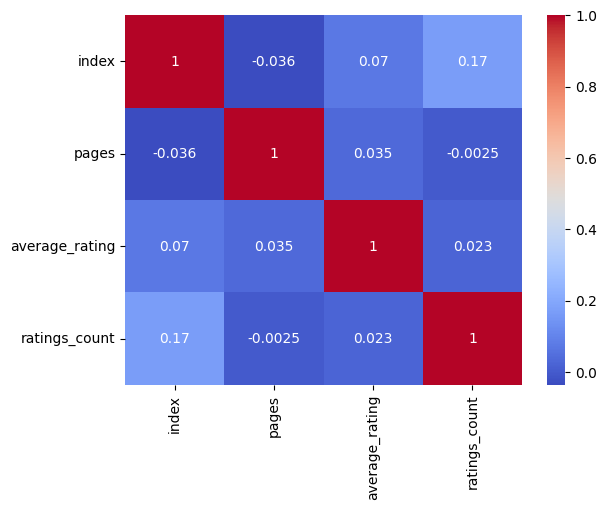

In [13]:
correlation_matrix = df1.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [14]:
missing_pct = df1['average_rating'].isnull().sum() / len(df1) * 100
print(f"Missing data: {missing_pct:.1f}%")

Missing data: 70.4%


Since most of the values are missing and there is no relation ship of this column to other i am simplly going to remove the column. But i highly recommend you to use Multiple Imputation or KNN imputation,etc to fill the missing values but i will remove it for now

In [15]:
df1.drop(columns=['average_rating'], inplace=True)

In [16]:
df1.head(2)

,index,title,author,pages,genre,description,published_date,publisher,ratings_count,thumbnail
0,2,Fictional Points of View,Peter Lamarque,252.0,Literature,the volume focuses on a wide range of thinkers...,1996-01-01 00:00:00,cornell university press,0,http://books.google.com/books/content?id=rh-om...
1,3,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802.0,Reference,science fiction and fantasy literature a check...,2010-09-01 00:00:00,wildside press llc,0,http://books.google.com/books/content?id=P8zW2...


In [17]:
df1.shape

(1437, 10)

In [18]:
df1['ratings_count'].describe()

,ratings_count
count,1437.000000
mean,5259.363953
std,47696.860907
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1000000.000000


In [20]:
df1[df1['ratings_count']>100000]

,index,title,author,pages,genre,description,published_date,publisher,ratings_count,thumbnail
1389,1936,The Psychology of Money,Morgan Housel,256.0,Business,explores how behavior and psychology shape fin...,2010-03-21 12:00:00,harriman house,250000,http://books.google.com/books/content?id=7zL_D...
1390,1937,Rich Dad Poor Dad,Robert Kiyosaki,336.0,Business,teaches financial literacy and wealthbuilding ...,2010-03-21 12:00:00,warner books,1000000,http://books.google.com/books/content?id=zv0oD...
1391,1938,Your Money or Your Life,"Vicki Robin, Joe Dominguez",368.0,Business,a ninestep program to achieve financial indepe...,2010-03-21 12:00:00,penguin books,150000,http://books.google.com/books/content?id=2c3_D...
1392,1939,I Will Teach You to Be Rich,Ramit Sethi,352.0,Business,a sixweek plan for young adults to master budg...,2010-03-21 12:00:00,workman publishing,200000,http://books.google.com/books/content?id=3z3_D...
1393,1940,The Millionaire Next Door,"Thomas J. Stanley, William D. Danko",272.0,Business,reveals the frugal habits of millionaires emph...,2010-03-21 12:00:00,taylor trade publishing,300000,http://books.google.com/books/content?id=8z4_D...
1394,1941,The Total Money Makeover,Dave Ramsey,349.0,Business,a stepbystep guide to eliminating debt budgeti...,2010-03-21 12:00:00,thomas nelson,400000,http://books.google.com/books/content?id=zv0oD...
1395,1942,Think and Grow Rich,Napoleon Hill,238.0,Lifestyle,a classic on achieving wealth through mindset ...,2010-03-21 12:00:00,the ralston society,600000,http://books.google.com/books/content?id=7zL_D...
1396,1943,The Intelligent Investor,Benjamin Graham,640.0,Business,the definitive guide to value investing teachi...,2010-03-21 12:00:00,harper and brothers,200000,http://books.google.com/books/content?id=2c3_D...
1397,1944,Atomic Habits,James Clear,320.0,Lifestyle,a guide to building good habits and breaking b...,2010-03-21 12:00:00,avery,700000,http://books.google.com/books/content?id=3z3_D...
1398,1945,The Richest Man in Babylon,George S. Clason,144.0,Business,timeless financial parables on saving investin...,2010-03-21 12:00:00,penguin books,400000,http://books.google.com/books/content?id=8z4_D...


In [21]:
df1['ratings_count'] = np.log1p(df1['ratings_count'])

In [22]:
percentile_99 = df1['ratings_count'].quantile(0.99)
df1['ratings_count'] = df1['ratings_count'].clip(upper=percentile_99)

In [ ]:
def get_ratings_count_google(title, author):
    try:
        query = f'intitle:{title}'
        if pd.notna(author):
            query += f'+inauthor:{author}'
        url = f'https://www.googleapis.com/books/v1/volumes?q={query}'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get('items')
            if items:
                volume_info = items[0].get('volumeInfo', {})
                return volume_info.get('ratingsCount')
    except Exception as e:
        print(f"Google API Error: {e}")
    return None

def get_ratings_count_openlibrary(title, author):
    try:
        url = f'https://openlibrary.org/search.json?title={title}'
        if pd.notna(author):
            url += f'&author={author}'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            docs = data.get('docs')
            if docs:
                # Open Library does not directly provide ratings count
                # We use 'edition_count' as a proxy (or skip if not useful)
                return docs[0].get('edition_count')
    except Exception as e:
        print(f"OpenLibrary API Error: {e}")
    return None

# Replace ratings_count for all rows
updated_counts = []
for idx, row in df1.iterrows():
    title = row['title']
    author = row['author']

    print(f"\n🔍 Processing: {title} — {author}")

    count = get_ratings_count_google(title, author)
    source = "Google"

    if count is None:
        count = get_ratings_count_openlibrary(title, author)
        source = "OpenLibrary" if count is not None else "None"

    updated_counts.append(count if count is not None else 0)
    print(f"✅ Count: {count} | Source: {source}")

    time.sleep(1.5)  # Respect API rate limits

# Assign updated values to ratings_count column
df1['ratings_count'] = updated_counts


🔍 Processing: Fictional Points of View — Peter Lamarque
✅ Count: 1 | Source: OpenLibrary

🔍 Processing: Science Fiction and Fantasy Literature — R. Reginald, Douglas Menville, Mary A. Burgess
✅ Count: 3 | Source: OpenLibrary

🔍 Processing: Fictional Space in the Modernist and Post-modernist American Novel — Carl Darryl Malmgren
✅ Count: 1 | Source: OpenLibrary

🔍 Processing: Mestizos Come Home! — Robert Con Davis-Undiano
✅ Count: None | Source: None

🔍 Processing: Fictional Practice: Magic, Narration, and the Power of Imagination — Bernd-Christian Otto, Dirk Johannsen
✅ Count: 1 | Source: OpenLibrary

🔍 Processing: Telling Lies in Modern American Autobiography — Timothy Dow Adams
✅ Count: 4 | Source: OpenLibrary

🔍 Processing: Essential Skills - Reading and Writing, Grade 1 — Teacher Created Resources, Inc
✅ Count: None | Source: None

🔍 Processing: Reload — Mary Flanagan, Austin Booth
✅ Count: 3 | Source: OpenLibrary

🔍 Processing: Presented Discourse in Popular Science — Olga Pilkin

Text(0.5, 1.0, 'top ratings')

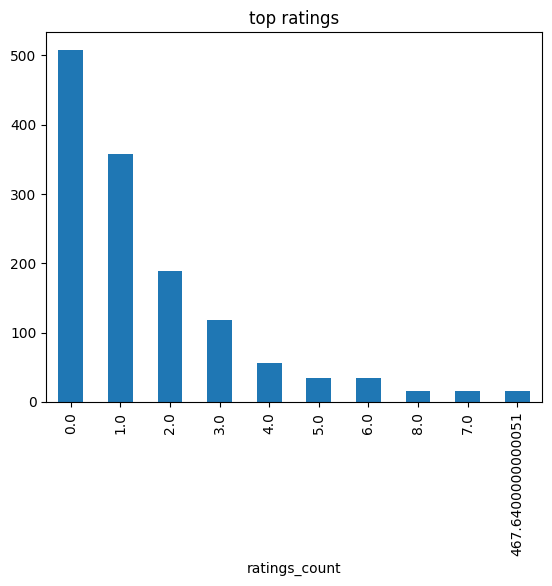

In [ ]:
df1['ratings_count'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("top ratings")

<Axes: ylabel='ratings_count'>

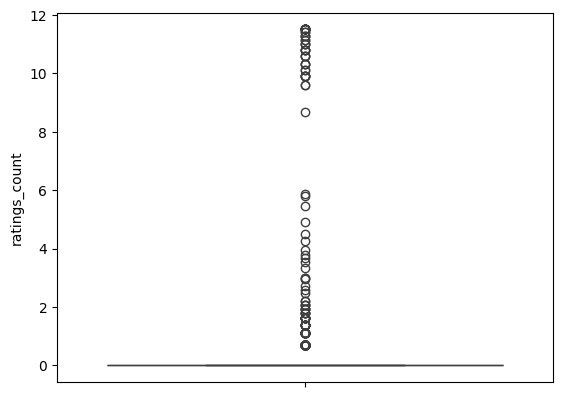

In [23]:
sns.boxplot(y='ratings_count', data=df1)

<Axes: xlabel='ratings_count', ylabel='Density'>

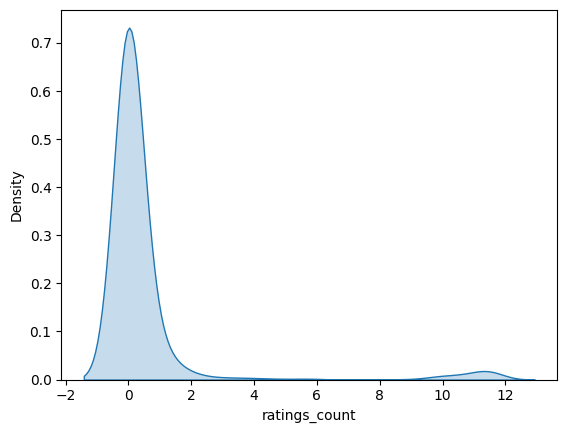

In [24]:
sns.kdeplot(df1['ratings_count'], fill=True)

In [25]:
high_ratings = df1[df1['ratings_count'] > 200]
print(f"Books with >200 ratings: {len(high_ratings)}")
print(high_ratings[['title', 'author', 'ratings_count']].sort_values('ratings_count', ascending=False))

Books with >200 ratings: 0
Empty DataFrame
Columns: [title, author, ratings_count]
Index: []


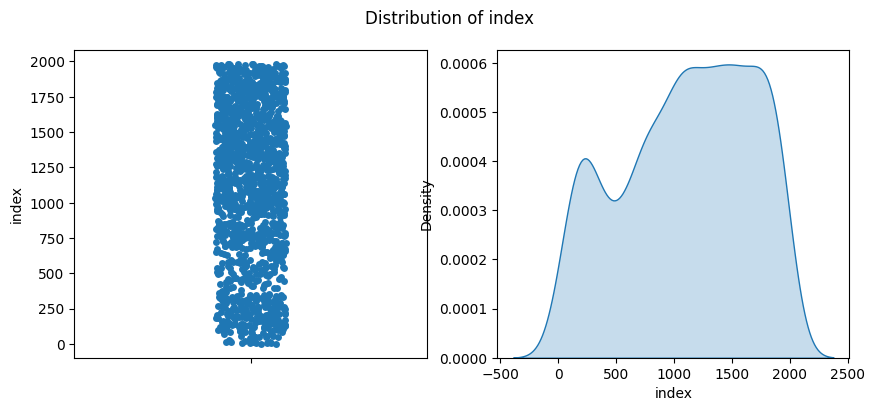

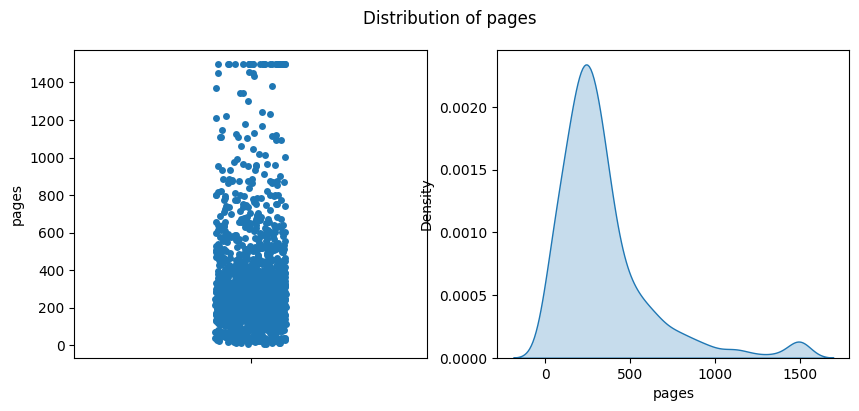

In [26]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col != 'ratings_count':
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.stripplot(y=df1[col])
        plt.subplot(1, 2, 2)
        sns.kdeplot(df1[col], fill=True)
        plt.suptitle(f'Distribution of {col}')
        plt.show()

<Axes: >

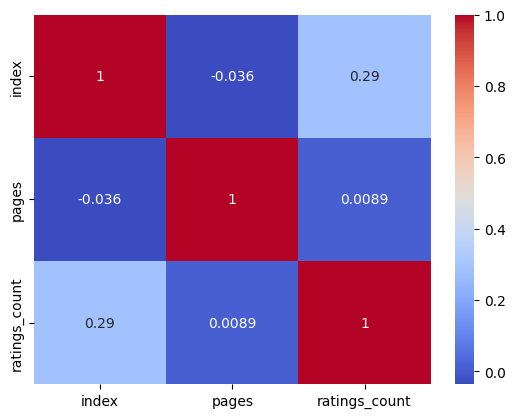

In [27]:
correlation_matrix = df1.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [31]:
df1.sample(5)

,index,title,author,pages,genre,description,published_date,publisher,ratings_count,thumbnail
458,824,Adolescent and Young Adult Addiction,"Jon Daily, LCSW, CADC II, Stacy Lehrer",137.0,Health & Medical,this thought provoking book adolescent young a...,2012-09-01 00:00:00,jon daily,0.000000,http://books.google.com/books/content?id=Dvqw8...
929,1409,The Hunger Games (Movie tie-in),Suzanne Collins,304.0,Children,first in the groundbreaking hunger games trilo...,2012-03-01 00:00:00,scholastic uk,0.693147,http://books.google.com/books/content?id=GWxGB...
513,922,Human Behavior in the Social Environment,Esther Urdang,637.0,Health & Medical,design and implement appropriate effective soc...,2013-05-13 00:00:00,routledge,0.000000,http://books.google.com/books/content?id=q2SgR...
835,1299,The Ford Foundation,Dwight MacDonald,210.0,Social Science,thirty years since it was first published macd...,2010-03-21 12:00:00,transaction publishers,0.000000,http://books.google.com/books/content?id=xR0Pe...
1396,1943,The Intelligent Investor,Benjamin Graham,640.0,Business,the definitive guide to value investing teachi...,2010-03-21 12:00:00,harper and brothers,11.512935,http://books.google.com/books/content?id=2c3_D...


In [32]:
df1['ratings_count'].isna().sum()

np.int64(0)

In [33]:
df1['ratings_count'].value_counts()

,count
ratings_count,
0.000000,1214
0.693147,93
1.098612,32
11.512935,19
1.386294,10
1.609438,9
9.903538,5
1.945910,4
1.791759,4


In [47]:
from scipy.stats import boxcox

In [48]:
df1['ratings_count_shifted'] = df1['ratings_count'] + 1

# Apply Box-Cox transformation
df1['ratings_count_boxcox'], lambda_value = boxcox(df1['ratings_count_shifted'])

# Check results
print(f"Optimal lambda: {lambda_value:.4f}")
print(f"Original skewness: {df1['ratings_count'].skew():.3f}")
print(f"Box-Cox skewness: {df1['ratings_count_boxcox'].skew():.3f}")

Optimal lambda: -5.1834
Original skewness: 4.704
Box-Cox skewness: 1.911


In [49]:
df1['ratings_count_shifted'].value_counts()

,count
ratings_count_shifted,
1.000000,1214
1.693147,93
2.098612,32
12.512935,19
2.386294,10
2.609438,9
10.903538,5
2.945910,4
2.791759,4


<Axes: xlabel='ratings_count_shifted', ylabel='Density'>

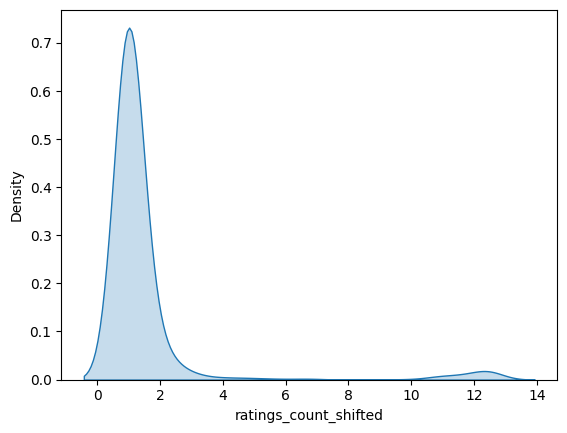

In [50]:
sns.kdeplot(df1['ratings_count_shifted'], fill=True)

i have tried log transformation binning box-cox and nothing seems to work so i will leave it

In [34]:
df1['thumbnail'].isna().sum()

np.int64(0)

In [5]:
temp_df = df1['thumbnail'].value_counts().head(6).index

In [6]:
temp_df = df1[df1['thumbnail'].isin(temp_df)]
temp_df

,index,title,author,pages,genre,description,published_date,publisher,average_rating,ratings_count,thumbnail
939,1420,Space and Place in The Hunger Games,"Deidre Anne Evans Garriott, Whitney Elaine Jon...",265.0,Literature,an international bestseller and the inspiratio...,2014-03-13 00:00:00,mcfarland,NaN,0,http://books.google.com/books/content?id=i6wzA...
1389,1936,The Psychology of Money,Morgan Housel,256.0,Business,explores how behavior and psychology shape fin...,2010-03-21 12:00:00,harriman house,4.3,250000,http://books.google.com/books/content?id=7zL_D...
1390,1937,Rich Dad Poor Dad,Robert Kiyosaki,336.0,Business,teaches financial literacy and wealthbuilding ...,2010-03-21 12:00:00,warner books,4.1,1000000,http://books.google.com/books/content?id=zv0oD...
1391,1938,Your Money or Your Life,"Vicki Robin, Joe Dominguez",368.0,Business,a ninestep program to achieve financial indepe...,2010-03-21 12:00:00,penguin books,4.0,150000,http://books.google.com/books/content?id=2c3_D...
1392,1939,I Will Teach You to Be Rich,Ramit Sethi,352.0,Business,a sixweek plan for young adults to master budg...,2010-03-21 12:00:00,workman publishing,4.2,200000,http://books.google.com/books/content?id=3z3_D...
1393,1940,The Millionaire Next Door,"Thomas J. Stanley, William D. Danko",272.0,Business,reveals the frugal habits of millionaires emph...,2010-03-21 12:00:00,taylor trade publishing,4.1,300000,http://books.google.com/books/content?id=8z4_D...
1395,1942,Think and Grow Rich,Napoleon Hill,238.0,Lifestyle,a classic on achieving wealth through mindset ...,2010-03-21 12:00:00,the ralston society,4.3,600000,http://books.google.com/books/content?id=7zL_D...
1399,1946,A Random Walk Down Wall Street,Burton G. Malkiel,464.0,Business,advocates passive investing through index fund...,2010-03-21 12:00:00,ww norton and company,4.1,100000,http://books.google.com/books/content?id=zv0oD...
1400,1947,You Are a Badass at Making Money,Jen Sincero,288.0,Lifestyle,motivates readers to overcome financial fears ...,2010-03-21 12:00:00,viking,4.1,120000,http://books.google.com/books/content?id=7zL_D...
1401,1948,The Simple Path to Wealth,JL Collins,286.0,Business,a guide to financial independence through savi...,2010-03-21 12:00:00,createspace,4.4,80000,http://books.google.com/books/content?id=2c3_D...


it is wired that more than one book have same cover page and the books also have certainly different thumbnail so we should replace them

In [7]:
def get_book_thumbnail(title, author):
    """Get correct thumbnail URL using Google Books API"""
    try:
        # Google Books API
        query = f"{title} {author}".replace(' ', '+')
        google_url = f"https://www.googleapis.com/books/v1/volumes?q={query}&maxResults=1"
        response = requests.get(google_url, timeout=5)

        if response.status_code == 200:
            data = response.json()
            if 'items' in data and len(data['items']) > 0:
                book = data['items'][0]['volumeInfo']
                if 'imageLinks' in book:
                    return book['imageLinks'].get('thumbnail', '')

        # Fallback to Open Library API
        ol_url = f"https://openlibrary.org/search.json?title={query}&limit=1"
        ol_response = requests.get(ol_url, timeout=5)

        if ol_response.status_code == 200:
            ol_data = ol_response.json()
            if 'docs' in ol_data and len(ol_data['docs']) > 0:
                if 'cover_i' in ol_data['docs'][0]:
                    cover_id = ol_data['docs'][0]['cover_i']
                    return f"https://covers.openlibrary.org/b/id/{cover_id}-M.jpg"

        return None
    except:
        return None

# Apply to your dataframe (process in batches to avoid rate limits)
def fix_thumbnails(df, batch_size=10):
    """Fix thumbnail URLs for all books"""
    df['thumbnail_fixed'] = ''

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        for idx, row in batch.iterrows():
            thumbnail = get_book_thumbnail(row['title'], row['author'])
            df.at[idx, 'thumbnail_fixed'] = thumbnail if thumbnail else row['thumbnail']
            time.sleep(0.1)  # Rate limiting
        print(f"Processed {min(i+batch_size, len(df))}/{len(df)} books")

    return df

# Usage
temp_df = fix_thumbnails(temp_df)

/tmp/ipython-input-7-1948279658.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thumbnail_fixed'] = ''


Processed 10/45 books
Processed 20/45 books
Processed 30/45 books
Processed 40/45 books
Processed 45/45 books


In [14]:
temp_df['thumbnail'].iloc[4]

'http://books.google.com/books/content?id=3z3_DwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'

still many of the books cover page says that books url is not available so we have try with different approach

In [15]:
!pip install google-generativeai

In [17]:
import google.generativeai as genai

# Configure Gemini API
genai.configure(api_key='apikey')
model = genai.GenerativeModel('gemini-1.5-flash')

def get_book_thumbnail(title, author):
    """Get correct thumbnail URL using Gemini API"""
    try:
        prompt = f"Find the Google Books API thumbnail URL for book: '{title}' by {author}. Return only the direct image URL."
        response = model.generate_content(prompt)
        thumbnail_url = response.text.strip()

        if thumbnail_url.startswith('http') and ('jpg' in thumbnail_url or 'jpeg' in thumbnail_url or 'png' in thumbnail_url):
            return thumbnail_url
        return None
    except:
        return None

def fix_thumbnails(df, batch_size=10):
    """Fix thumbnail URLs for all books"""
    df['thumbnail_fixed'] = ''

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        for idx, row in batch.iterrows():
            thumbnail = get_book_thumbnail(row['title'], row['author'])
            df.at[idx, 'thumbnail_fixed'] = thumbnail if thumbnail else row['thumbnail']
            time.sleep(1)
        print(f"Processed {min(i+batch_size, len(df))}/{len(df)} books")

    return df

# Usage
tempo_df = fix_thumbnails(temp_df)

/tmp/ipython-input-17-1432613557.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thumbnail_fixed'] = ''


Processed 10/45 books


Processed 20/45 books


Processed 30/45 books
Processed 40/45 books
Processed 45/45 books


In [31]:
tempo_df['thumbnail']

,thumbnail
939,http://books.google.com/books/content?id=i6wzA...
1389,http://books.google.com/books/content?id=7zL_D...
1390,http://books.google.com/books/content?id=zv0oD...
1391,http://books.google.com/books/content?id=2c3_D...
1392,http://books.google.com/books/content?id=3z3_D...
1393,http://books.google.com/books/content?id=8z4_D...
1395,http://books.google.com/books/content?id=7zL_D...
1399,http://books.google.com/books/content?id=zv0oD...
1400,http://books.google.com/books/content?id=7zL_D...
1401,http://books.google.com/books/content?id=2c3_D...


There is still much to do with this dataset, but hopefully this will provide guidance to start working with it.

In [32]:
df1.iloc[tempo_df.index, tempo_df.columns.get_loc('thumbnail')] = tempo_df['thumbnail']